In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

reading the dataset

In [2]:
data = pd.read_csv('/content/Fraud.csv')

In [3]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0


In [4]:
data.shape

(517898, 11)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517898 entries, 0 to 517897
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            517898 non-null  int64  
 1   type            517898 non-null  object 
 2   amount          517898 non-null  float64
 3   nameOrig        517898 non-null  object 
 4   oldbalanceOrg   517898 non-null  float64
 5   newbalanceOrig  517898 non-null  float64
 6   nameDest        517898 non-null  object 
 7   oldbalanceDest  517898 non-null  float64
 8   newbalanceDest  517897 non-null  float64
 9   isFraud         517897 non-null  float64
 10  isFlaggedFraud  517897 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 43.5+ MB


In [6]:
data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    1
isFraud           1
isFlaggedFraud    1
dtype: int64

As there aren't many rows with null entries, also there are enought records present inside the dataset. Dropping the records with null entries won't affect the performance of the model.

In [7]:
data.dropna(inplace=True)

we will drop nameOrig, and nameDest columns because they are not even the categorical values, these are just transaction id's

In [8]:
data.drop(['nameOrig', 'nameDest'], axis=1, inplace=True)

In [9]:
data.isnull().sum()

step              0
type              0
amount            0
oldbalanceOrg     0
newbalanceOrig    0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

Let's replace all the categorical values of the 'type' column by labels

In [10]:
labels = {'CASH_IN': 1, 'CASH_OUT': 2, 'DEBIT': 3, 'PAYMENT': 4 ,'TRANSFER': 5}

In [11]:
data['Type'] = data['type'].map(labels)

In [12]:
data.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,Type
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0.0,0.0,4
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0.0,0.0,4
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,1.0,0.0,5
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1.0,0.0,2
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0.0,0.0,4


In [13]:
data.drop('type', axis=1, inplace=True)

In [14]:
data.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,Type
0,1,9839.64,170136.0,160296.36,0.0,0.0,0.0,0.0,4
1,1,1864.28,21249.0,19384.72,0.0,0.0,0.0,0.0,4
2,1,181.00,181.0,0.00,0.0,0.0,1.0,0.0,5
3,1,181.00,181.0,0.00,21182.0,0.0,1.0,0.0,2
4,1,11668.14,41554.0,29885.86,0.0,0.0,0.0,0.0,4


In [15]:
data.corr()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,Type
step,1.000000,-0.041766,0.004481,0.004952,0.013626,-0.013021,-0.020704,NaN,-0.069069
amount,-0.041766,1.000000,-0.008830,-0.010322,0.214916,0.317800,0.052348,NaN,0.063411
oldbalanceOrg,0.004481,-0.008830,1.000000,0.999241,0.091653,0.061926,-0.000539,NaN,-0.336548
newbalanceOrig,0.004952,-0.010322,0.999241,1.000000,0.093196,0.061441,-0.006301,NaN,-0.349235
oldbalanceDest,0.013626,0.214916,0.091653,0.093196,1.000000,0.968636,-0.005212,NaN,-0.157347
newbalanceDest,-0.013021,0.317800,0.061926,0.061441,0.968636,1.000000,-0.001807,NaN,-0.117774
isFraud,-0.020704,0.052348,-0.000539,-0.006301,-0.005212,-0.001807,1.000000,NaN,0.011917
isFlaggedFraud,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Type,-0.069069,0.063411,-0.336548,-0.349235,-0.157347,-0.117774,0.011917,NaN,1.000000


[]

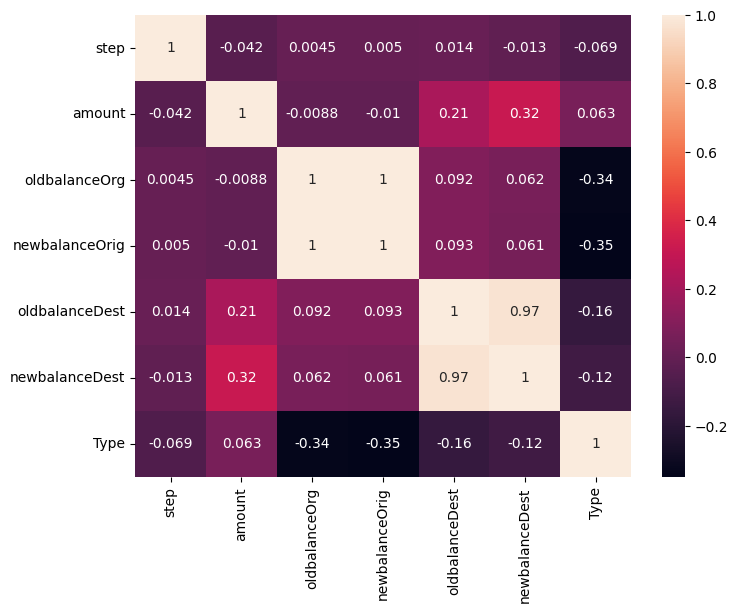

In [16]:
plt.figure(figsize=(8,6))
sns.heatmap(data.drop(['isFraud', 'isFlaggedFraud'], axis=1).corr(), annot=True)
plt.plot()

In [17]:
data['isFraud'].value_counts()

0.0    517664
1.0       233
Name: isFraud, dtype: int64

The dataset is highly imbalanced.

Let's remove all the fraudlant records

In [18]:
fraud_samples = data[data['isFraud'] == 1.0]

[]

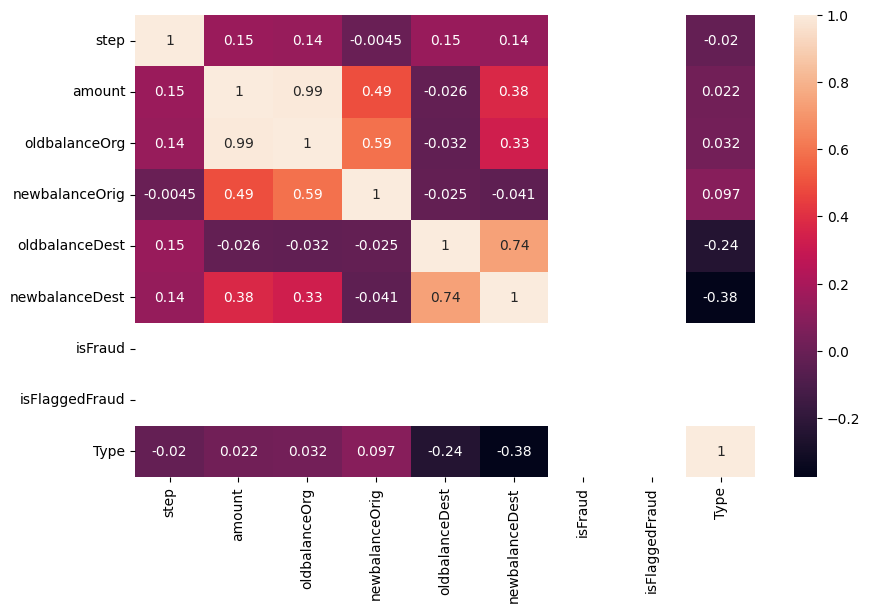

In [19]:
plt.figure(figsize=(10,6))
sns.heatmap(fraud_samples.corr(), annot=True)
plt.plot()

In case of fraudlant transactions, there is a direct correlation between the available balance before transaction and the amount of transaction.

In [20]:
fraud_samples.Type.value_counts()

2    121
5    112
Name: Type, dtype: int64

In [21]:
data.Type.value_counts()

2    188581
4    170076
1    113380
5     42126
3      3734
Name: Type, dtype: int64

[]

<Figure size 600x600 with 0 Axes>

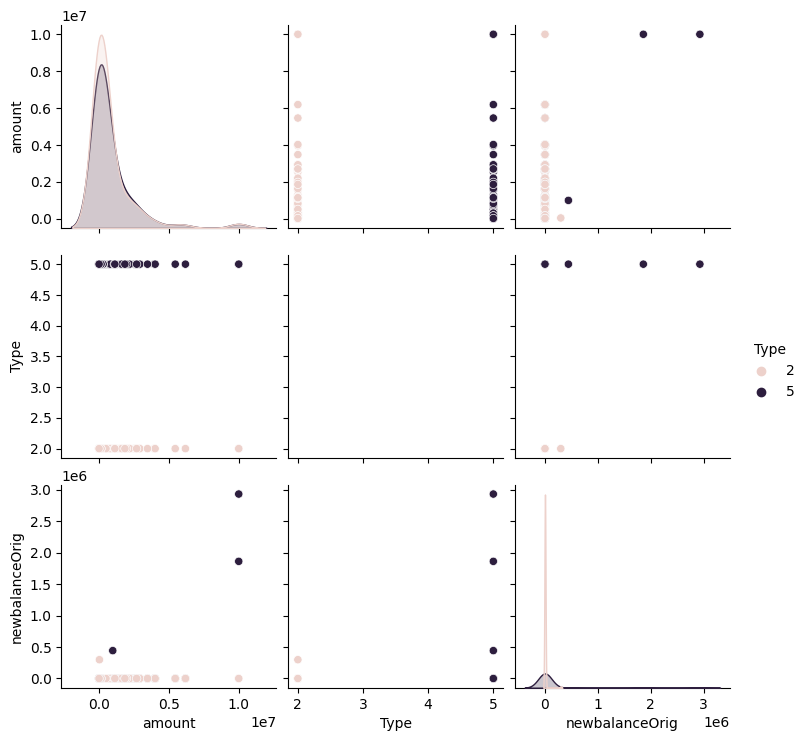

In [22]:
plt.figure(figsize=(6,6))
sns.pairplot(fraud_samples, hue='Type', vars=['amount', 'Type', 'newbalanceOrig'])
plt.plot()

All the fraudalent transactions are taken place either during CASH_OUT or during TRANSFER

In [23]:
from sklearn.feature_selection import mutual_info_classif
mutual_info = mutual_info_classif(data.drop(['isFraud'], axis=1), data['isFraud'])

In [24]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = fraud_samples.drop('isFraud', axis=1).columns
mutual_info.sort_values(ascending=False)

Type              0.033093
step              0.010176
amount            0.000724
oldbalanceOrg     0.000552
newbalanceOrig    0.000179
newbalanceDest    0.000069
oldbalanceDest    0.000048
isFlaggedFraud    0.000030
dtype: float64

The 'step' feature is showing high correlation

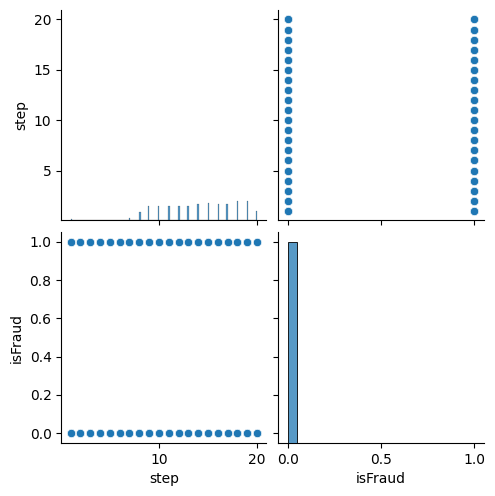

In [25]:
sns.pairplot(data, vars=['step', 'isFraud'])

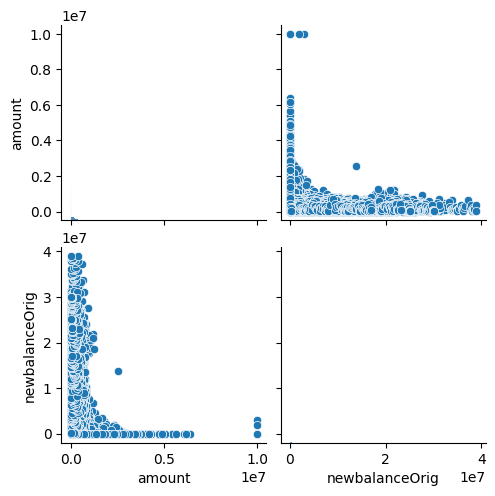

In [26]:
sns.pairplot(data, vars=['amount', 'newbalanceOrig'])

In [27]:
fraud_samples

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,Type
2,1,181.00,181.00,0.0,0.00,0.00,1.0,0.0,5
3,1,181.00,181.00,0.0,21182.00,0.00,1.0,0.0,2
251,1,2806.00,2806.00,0.0,0.00,0.00,1.0,0.0,5
252,1,2806.00,2806.00,0.0,26202.00,0.00,1.0,0.0,2
680,1,20128.00,20128.00,0.0,0.00,0.00,1.0,0.0,5
...,...,...,...,...,...,...,...,...,...
481251,19,10000000.00,10000000.00,0.0,504326.62,10342417.90,1.0,0.0,2
481252,19,1861008.32,1861008.32,0.0,0.00,0.00,1.0,0.0,5
481253,19,1861008.32,1861008.32,0.0,0.00,1789942.62,1.0,0.0,2
499609,20,16614.82,16614.82,0.0,0.00,0.00,1.0,0.0,5


In [28]:
fraud_samples[fraud_samples.newbalanceOrig != 0]

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,Type
4440,4,10000000.00,12930418.44,2930418.44,0.00,0.00,1.0,0.0,5
60853,9,994453.20,1437370.87,442917.67,194812.76,665743.67,1.0,0.0,5
377151,17,42062.82,340830.43,298767.61,398931.35,678419.64,1.0,0.0,2
481250,19,10000000.00,11861008.32,1861008.32,0.00,0.00,1.0,0.0,5


In fraudlant transaction, either entire availble balance is wiped out or entire transaction amount is wiped out.

In [30]:
data.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,Type
0,1,9839.64,170136.0,160296.36,0.0,0.0,0.0,0.0,4
1,1,1864.28,21249.0,19384.72,0.0,0.0,0.0,0.0,4
2,1,181.00,181.0,0.00,0.0,0.0,1.0,0.0,5
3,1,181.00,181.0,0.00,21182.0,0.0,1.0,0.0,2
4,1,11668.14,41554.0,29885.86,0.0,0.0,0.0,0.0,4


In [31]:
data.drop(['step', 'isFlaggedFraud'], axis=1, inplace=True)

In [32]:
data.head()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,Type
0,9839.64,170136.0,160296.36,0.0,0.0,0.0,4
1,1864.28,21249.0,19384.72,0.0,0.0,0.0,4
2,181.00,181.0,0.00,0.0,0.0,1.0,5
3,181.00,181.0,0.00,21182.0,0.0,1.0,2
4,11668.14,41554.0,29885.86,0.0,0.0,0.0,4


We wiil drop 'step' and 'isFlaggedFraud' features since they are not contributing much in classification

In [33]:
fraud_samples.drop(['step', 'isFlaggedFraud'], axis=1, inplace=True)

<ipython-input-33-ef889ab51c3b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fraud_samples.drop(['step', 'isFlaggedFraud'], axis=1, inplace=True)


In [34]:
fraud_samples.head()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,Type
2,181.0,181.0,0.0,0.0,0.0,1.0,5
3,181.0,181.0,0.0,21182.0,0.0,1.0,2
251,2806.0,2806.0,0.0,0.0,0.0,1.0,5
252,2806.0,2806.0,0.0,26202.0,0.0,1.0,2
680,20128.0,20128.0,0.0,0.0,0.0,1.0,5


<Axes: >

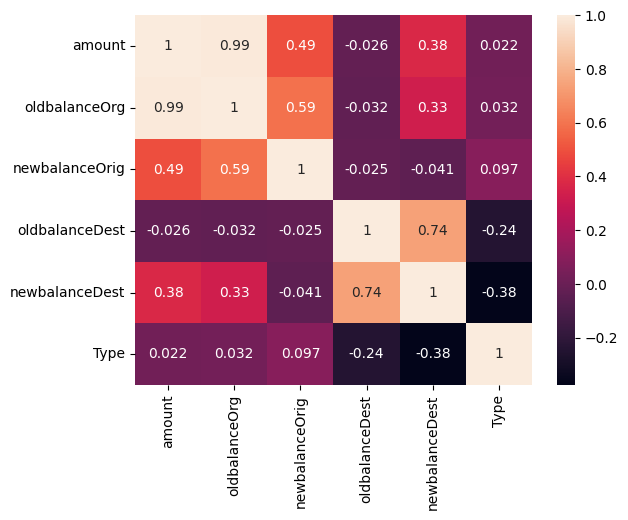

In [36]:
sns.heatmap(fraud_samples.drop('isFraud', axis=1).corr(), annot=True)

In [40]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

Let's use the SMOTE technique to Over sampling

In [49]:
X, y = smote.fit_resample(data.drop('isFraud', axis=1), data['isFraud'])

In [50]:
y.value_counts()

0.0    517664
1.0    517664
Name: isFraud, dtype: int64

Both the classes have equal samples

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20)

Let's train using Logistic Regression

In [52]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()

In [53]:
model = classifier.fit(X_train, y_train)

In [54]:
y_pred = model.predict(X_test)

In [57]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.926116954658579

In [59]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[142975,  12785],
       [ 10163, 144676]])

Since, we have generated new samples and balances the dataset, it will be better if these repeated samples are used training multiple models. Ensemble techniques will be useful in such scinarios. Training a single model with duplicate samples could make that model hardcode the repeated samples. It will be smart to use use those repeated samples to train different model.

In [60]:
from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier()

In [61]:
model_rf = classifier_rf.fit(X_train, y_train)

In [62]:
y_pred_rf = model_rf.predict(X_test)

In [63]:
accuracy_rf = accuracy_score(y_test, y_pred_rf)
accuracy_rf

0.9982099105277222

In [64]:
confusion_matrix(y_test, y_pred_rf)

array([[155306,    454],
       [   102, 154737]])

<Axes: >

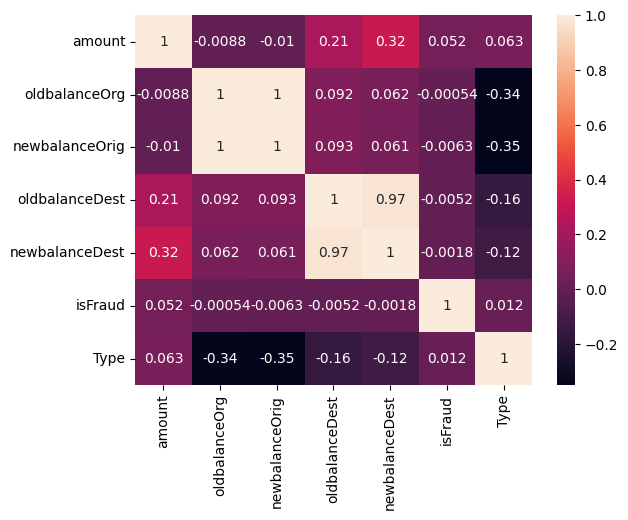

In [65]:
sns.heatmap(data.corr(), annot=True)

There is a problem of multicollinearity. Either 'oldbalanceDest' or 'newbalanceDest' should be selected for training and either 'oldbalanceorg' or 'newbalanceOrig' should be selected.

In [66]:
data_new = data.drop(['oldbalanceOrg', 'newbalanceOrig'], axis=1)

In [67]:
data_new.head()

,amount,oldbalanceDest,newbalanceDest,isFraud,Type
0,9839.64,0.0,0.0,0.0,4
1,1864.28,0.0,0.0,0.0,4
2,181.00,0.0,0.0,1.0,5
3,181.00,21182.0,0.0,1.0,2
4,11668.14,0.0,0.0,0.0,4


In [68]:
X_new, y_new = smote.fit_resample(data_new.drop('isFraud', axis=1), data_new['isFraud'])

In [69]:
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y_new, test_size=0.3, random_state=20)

In [70]:
model_rf_new = classifier_rf.fit(X_train_new, y_train_new)

In [71]:
y_pred_new = model_rf_new.predict(X_test_new)
accuracy_rf_new = accuracy_score(y_test, y_pred_new)
accuracy_rf_new

0.9826786306459454

In [73]:
confusion_matrix(y_test, y_pred_new)

array([[152336,   3424],
       [  1956, 152883]])

Addressing multicollinearity is not helping

The best accuracy of 99.82 is obtained with Random Forest classifier without addressing the features with high correlation